TORONTO NEIGHBORHOODS: CLUSTERING
=

First, we import some libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

Now, we import toronto_poscode_latlng.csv into a dataframe

In [2]:
toronto_df = pd.read_csv('C:/Users/NITROPC/Desktop/DATA SCIENCE/CERTIFICACION IBM/09 - PROYECTO FINAL/02 - AGRUPACION K-MEANS/data/toronto_poscode_coord.csv')
print(toronto_df.shape)
toronto_df.head()

(103, 5)


,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188


In [3]:
print('The dataframe has {} boroughs and {} postal codes.'.format(
        len(toronto_df['Borough'].unique()),
        toronto_df.shape[0]))

The dataframe has 10 boroughs and 103 postal codes.


CREATING THE MAP

Now that we have the data needed we can create a map of each neighborhood(postal code) using Folium module

In [4]:
from geopy.geocoders import Nominatim
import folium

In [5]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent = 'toronto_explorer')

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


Now, we can see the neighborhoods in the map

In [6]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)

for lat, lng, borough, neighborhood in zip(toronto_df['latitude'], toronto_df['longitude'], toronto_df['Borough'], toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='g',
        fill_opacity= 1,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

MAPPING TORONTO BOROUGHS

We pick the boroughs that contain 'toronto' name in it:

In [7]:
boroughs_df = toronto_df[(toronto_df['Borough']=='Central Toronto') | (toronto_df['Borough']=='Downtown Toronto') | (toronto_df['Borough']=='West Toronto') | (toronto_df['Borough']=='East Toronto')].reset_index(drop=True)
print(boroughs_df.shape)
boroughs_df.head()

(39, 5)


,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804
3,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587
4,M4E,East Toronto,The Beaches,43.67709,-79.29547


In [8]:
boroughs_df['Neighbourhood'] = boroughs_df['Neighbourhood'].apply(lambda x: x.split(',')[0])

boroughs_df

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M5A,Downtown Toronto,Regent Park,43.65512,-79.36264
1,M7A,Downtown Toronto,Queen's Park,43.66253,-79.39188
2,M5B,Downtown Toronto,Garden District,43.65739,-79.37804
3,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587
4,M4E,East Toronto,The Beaches,43.67709,-79.29547
5,M5E,Downtown Toronto,Berczy Park,43.64536,-79.37306
6,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493
7,M6G,Downtown Toronto,Christie,43.66869,-79.42071
8,M5H,Downtown Toronto,Richmond,43.64970,-79.38258
9,M6H,West Toronto,Dufferin,43.66505,-79.43891


Now, we get the geografical coordinates of Central Toronto

In [9]:
address = 'Central Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Central Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Central Toronto are 43.65238435, -79.38356765.


Now, we create a map with the neighbourhoods containing 'toronto' in his name

In [10]:
map_Boroughs = folium.Map(location = [latitude, longitude], zoom_start = 12)

for lat, lng, borough, neighborhood in zip(boroughs_df['latitude'], boroughs_df['longitude'], boroughs_df['Borough'], boroughs_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='g',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boroughs)
map_Boroughs
    

EXPLORE A NEIGHBORHOOD

First we use FourSquare API to explore the Toronto neighborhoods by defining the credentials

In [11]:
CLIENT_ID = 'FRYWC2MDRQY302XEHS1Q40MFONKCG52JZOK1CIET233QUMD3' 
CLIENT_SECRET = 'LFFQRNFRCEH4VZYAE2NNV4RAF11WLZEZWDGCF1AN0L44ARDV' 
VERSION = '20210601' 
LIMIT = 100 

Let´s explore the first neighborhood in the dataframe

In [12]:
boroughs_df.head(1)

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M5A,Downtown Toronto,Regent Park,43.65512,-79.36264


In [13]:
neighborhood_lat = boroughs_df.loc[0, 'latitude']
neighborhood_lng = boroughs_df.loc[0, 'longitude']
neighborhood_name = boroughs_df.loc[0, 'Neighbourhood']

print('The coordinate values of {} are\n- latitude: {},\n- longitude: {}.'.format(neighborhood_name, 
                                                               neighborhood_lat, 
                                                               neighborhood_lng))




The coordinate values of Regent Park are
- latitude: 43.65512000000007,
- longitude: -79.36263999999994.


Now, we get the top 100 venues that are in Regent Park within a radius fo 500 metres

In [14]:
LIMIT = 100
RADIUS = 750

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_lat, 
        neighborhood_lng,
        RADIUS,
        LIMIT)

In [15]:
import requests

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60c2193df126ef27d3128081'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 76,
  'suggestedBounds': {'ne': {'lat': 43.66187000675007,
    'lng': -79.35332786684909},
   'sw': {'lat': 43.648369993250064, 'lng': -79.3719521331508}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53b8466a498e83df908c3f21',
       'name': 'Tandem Coffee',
       'location': {'address': '368 King St E',
        'crossStreet': 'at Trinity St',
        'lat': 43.65355870959944,
        'lng': -79.36180945913513,
        'labeledLatLngs': [{'label':

In [16]:
results['response']['groups'][0]['items']

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '53b8466a498e83df908c3f21',
   'name': 'Tandem Coffee',
   'location': {'address': '368 King St E',
    'crossStreet': 'at Trinity St',
    'lat': 43.65355870959944,
    'lng': -79.36180945913513,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.65355870959944,
      'lng': -79.36180945913513}],
    'distance': 186,
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['368 King St E (at Trinity St)',
     'Toronto ON',
     'Canada']},
   'categories': [{'id': '4bf58dd8d48988d1e0931735',
     'name': 'Coffee Shop',
     'pluralName': 'Coffee Shops',
     'shortName': 'Coffee Shop',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  're

All the information is in the 'items' key

In [17]:
import json
from pandas import json_normalize

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.head(2)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id
0,e-0-53b8466a498e83df908c3f21-0,0,"[{'summary': 'This spot is popular', 'type': '...",53b8466a498e83df908c3f21,Tandem Coffee,368 King St E,at Trinity St,43.653559,-79.361809,"[{'label': 'display', 'lat': 43.65355870959944...",...,Toronto,ON,Canada,"[368 King St E (at Trinity St), Toronto ON, Ca...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN,NaN
1,e-0-54ea41ad498e9a11e9e13308-1,0,"[{'summary': 'This spot is popular', 'type': '...",54ea41ad498e9a11e9e13308,Roselle Desserts,362 King St E,Trinity St,43.653447,-79.362017,"[{'label': 'display', 'lat': 43.65344672305267...",...,Toronto,ON,Canada,"[362 King St E (Trinity St), Toronto ON M5A 1K...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],M5A 1K9,NaN,NaN


We can filter the dataframe contaning data columns needed only

In [18]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]
nearby_venues.head(2)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Tandem Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.653559,-79.361809
1,Roselle Desserts,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",43.653447,-79.362017


Now, we extract the category name from venues.categories column

In [19]:
nearby_venues['venue.categories'] = nearby_venues['venue.categories'].apply(lambda x: x[0]['name'])


In [20]:
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Tandem Coffee,Coffee Shop,43.653559,-79.361809
1,Roselle Desserts,Bakery,43.653447,-79.362017
2,Rooster Coffee,Coffee Shop,43.651900,-79.365609
3,Berkeley Church,Event Space,43.655123,-79.365873
4,Sumach Espresso,Coffee Shop,43.658135,-79.359515


EXPLORE ALL THE NEIGHBORHOODS

We create a function that allows us to repeat the same process to all neighborhoods

In [21]:
def get_nearby_venues(neighborhoods, latitudes, longitudes):
    
    LIMIT = 100
    RADIUS = 1000
    
    venues_list = []
    
    for neighborhood, lat, lng in zip(neighborhoods, latitudes, longitudes):
        print(neighborhood)         
       
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng,
                RADIUS,
                LIMIT)
        
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues_list.append([(neighborhood, 
                            lat, 
                            lng,  
                            v['venue']['name'],
                            v['venue']['location']['lat'],
                            v['venue']['location']['lng'],
                            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])    
    nearby_venues.columns = ['Neighborhood', 
          'Neighborhood Latitude', 
          'Neighborhood Longitude', 
          'Venue', 
          'Venue Latitude', 
          'Venue Longitude', 
          'Venue Category']
    
    return(nearby_venues)

In [22]:
boroughs_venues = get_nearby_venues(boroughs_df['Neighbourhood'], 
                                   boroughs_df['latitude'], 
                                   boroughs_df['longitude'])

Regent Park
Queen's Park
Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond
Dufferin
Harbourfront East
Little Portugal
The Danforth West
Toronto Dominion Centre
Brockton
India Bazaar
Commerce Court
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park
North Toronto West
The Annex
Parkdale
Davisville
University of Toronto
Runnymede
Moore Park
Kensington Market
Summerhill West
CN Tower
Rosedale
Stn A PO Boxes
St. James Town
First Canadian Place
Church and Wellesley
Business reply mail Processing Centre


In [23]:
print(boroughs_venues.shape)
boroughs_venues.to_csv('C:/Users/NITROPC/Desktop/DATA SCIENCE/CERTIFICACION IBM/09 - PROYECTO FINAL/02 - AGRUPACION K-MEANS/data/boroughs_venues.csv', index=False)
boroughs_venues.head()

(3248, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regent Park,43.65512,-79.36264,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,Regent Park,43.65512,-79.36264,Roselle Desserts,43.653447,-79.362017,Bakery
2,Regent Park,43.65512,-79.36264,Rooster Coffee,43.651900,-79.365609,Coffee Shop
3,Regent Park,43.65512,-79.36264,Sumach Espresso,43.658135,-79.359515,Coffee Shop
4,Regent Park,43.65512,-79.36264,Impact Kitchen,43.656369,-79.356980,Restaurant


How many venues were retourned for each neighborhood?

In [24]:
boroughs_venues.groupby(by = 'Neighborhood').count().sort_values(by = 'Venue', ascending = False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
St. James Town,136,136,136,136,136,136
Berczy Park,100,100,100,100,100,100
Garden District,100,100,100,100,100,100
Toronto Dominion Centre,100,100,100,100,100,100
The Annex,100,100,100,100,100,100
Stn A PO Boxes,100,100,100,100,100,100
Richmond,100,100,100,100,100,100
Queen's Park,100,100,100,100,100,100
Brockton,100,100,100,100,100,100


In [25]:
print('There are {} unique venue categories.'.format(len(boroughs_venues['Venue Category'].unique())))

There are 268 unique venue categories.


ANALIZING EACH NEIGHBORHOOD

We are going to create a dataframe with the top 10 venues for each neighborhood

First, we make One Hot Encoding to the venue category


In [26]:
boroughs_onehot = pd.get_dummies(boroughs_venues[['Venue Category']], prefix = '', prefix_sep = '')

boroughs_onehot['Neighborhood'] = boroughs_venues['Neighborhood']



In [27]:
len(boroughs_onehot.Neighborhood.unique())

38

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [28]:
boroughs_grouped = boroughs_onehot.groupby(by='Neighborhood').mean().reset_index()
boroughs_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.00,0.00,0.00,0.000,0.010000,0.000000,0.00000,0.000000,0.00,...,0.00,0.010000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000
1,Brockton,0.01,0.00,0.00,0.000,0.010000,0.000000,0.00000,0.000000,0.00,...,0.00,0.020000,0.000000,0.010000,0.00,0.000000,0.00,0.00,0.00,0.010000
2,Business reply mail Processing Centre,0.00,0.00,0.00,0.000,0.010000,0.000000,0.00000,0.000000,0.00,...,0.01,0.020000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.010000
3,CN Tower,0.00,0.00,0.00,0.000,0.010000,0.000000,0.00000,0.000000,0.02,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.01,0.00,0.00,0.050000
4,Central Bay Street,0.00,0.00,0.00,0.000,0.010000,0.000000,0.00000,0.000000,0.00,...,0.01,0.020000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.020000
5,Christie,0.00,0.00,0.00,0.000,0.010000,0.000000,0.00000,0.000000,0.00,...,0.00,0.020000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000
6,Church and Wellesley,0.00,0.01,0.01,0.000,0.000000,0.000000,0.00000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.01,0.00,0.00,0.010000
7,Commerce Court,0.00,0.00,0.00,0.000,0.010000,0.000000,0.00000,0.000000,0.00,...,0.00,0.020000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000
8,Davisville,0.00,0.00,0.00,0.000,0.010000,0.000000,0.00000,0.000000,0.00,...,0.00,0.010000,0.000000,0.000000,0.00,0.000000,0.00,0.01,0.00,0.000000
9,Davisville North,0.00,0.00,0.00,0.000,0.010000,0.000000,0.00000,0.000000,0.00,...,0.00,0.010000,0.000000,0.010000,0.00,0.010000,0.00,0.00,0.00,0.000000


Now, we  create a dataframe with the top 10 most common venues.

First, we define a function to sort the venues in descending order

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boroughs_grouped['Neighborhood']

for ind in np.arange(boroughs_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boroughs_grouped.iloc[ind, :], num_top_venues)

In [31]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Restaurant,Café,Italian Restaurant,Japanese Restaurant,Cocktail Bar,Park,Gym,Deli / Bodega,Liquor Store
1,Brockton,Café,Coffee Shop,Bar,Bakery,Sandwich Place,Restaurant,Furniture / Home Store,New American Restaurant,Gift Shop,Bank
2,Business reply mail Processing Centre,Coffee Shop,Café,Restaurant,Gym,Hotel,Cosmetics Shop,Art Gallery,Sushi Restaurant,Shoe Store,Beer Bar
3,CN Tower,Coffee Shop,Café,Park,Yoga Studio,Dessert Shop,Gym / Fitness Center,French Restaurant,Italian Restaurant,Spa,Diner
4,Central Bay Street,Coffee Shop,Sushi Restaurant,Café,Japanese Restaurant,Hotel,Clothing Store,Restaurant,Yoga Studio,Sandwich Place,Pizza Place


In [32]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Restaurant,Café,Italian Restaurant,Japanese Restaurant,Cocktail Bar,Park,Gym,Deli / Bodega,Liquor Store
1,Brockton,Café,Coffee Shop,Bar,Bakery,Sandwich Place,Restaurant,Furniture / Home Store,New American Restaurant,Gift Shop,Bank
2,Business reply mail Processing Centre,Coffee Shop,Café,Restaurant,Gym,Hotel,Cosmetics Shop,Art Gallery,Sushi Restaurant,Shoe Store,Beer Bar
3,CN Tower,Coffee Shop,Café,Park,Yoga Studio,Dessert Shop,Gym / Fitness Center,French Restaurant,Italian Restaurant,Spa,Diner
4,Central Bay Street,Coffee Shop,Sushi Restaurant,Café,Japanese Restaurant,Hotel,Clothing Store,Restaurant,Yoga Studio,Sandwich Place,Pizza Place
5,Christie,Korean Restaurant,Coffee Shop,Café,Grocery Store,Japanese Restaurant,Theater,Pizza Place,Ice Cream Shop,Caribbean Restaurant,Cocktail Bar
6,Church and Wellesley,Japanese Restaurant,Coffee Shop,Sushi Restaurant,Restaurant,Café,Park,Diner,Dessert Shop,Bookstore,Clothing Store
7,Commerce Court,Coffee Shop,Café,Japanese Restaurant,Restaurant,Hotel,Gym,Cocktail Bar,Sushi Restaurant,Deli / Bodega,Beer Bar
8,Davisville,Coffee Shop,Sushi Restaurant,Pizza Place,Italian Restaurant,Indian Restaurant,Café,Bakery,Bank,Restaurant,Sandwich Place
9,Davisville North,Coffee Shop,Italian Restaurant,Pizza Place,Café,Dessert Shop,Sushi Restaurant,Fast Food Restaurant,Japanese Restaurant,Sandwich Place,Restaurant


CLUSTERING THE NEIGHBORHOODS

We use k-means to cluster the neighborhood using different k centroids, into 6 groups

C:\Users\NITROPC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


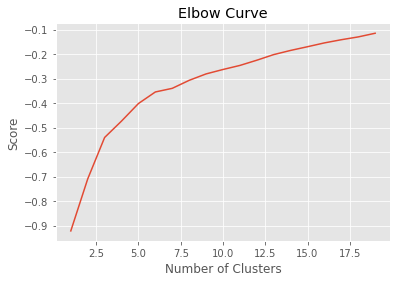

In [43]:
plt.style.use('ggplot')
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(boroughs_grouped_clustering).score(boroughs_grouped_clustering) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [44]:
from sklearn.cluster import KMeans

kclusters = 6
boroughs_grouped_clustering = boroughs_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boroughs_grouped_clustering)

kmeans.labels_

array([0, 5, 0, 5, 0, 5, 0, 0, 3, 3, 5, 0, 0, 0, 0, 3, 3, 5, 4, 5, 3, 3,
       3, 0, 3, 0, 1, 2, 3, 0, 0, 3, 3, 3, 3, 3, 0, 5])

Let´s create a dataframe that include the cluster and the top 10 venues for each neighborhood

In [45]:
neighborhoods_venues_sorted['Cluster Labels'] = pd.Series(kmeans.labels_)

boroughs_merged = boroughs_df

boroughs_merged = boroughs_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

boroughs_merged.head()

,PostalCode,Borough,Neighbourhood,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M5A,Downtown Toronto,Regent Park,43.65512,-79.36264,Coffee Shop,Restaurant,Café,Bakery,Italian Restaurant,Pub,Thai Restaurant,Beer Store,Theater,Sushi Restaurant,3
1,M7A,Downtown Toronto,Queen's Park,43.66253,-79.39188,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Park,Pizza Place,Café,Sandwich Place,Breakfast Spot,Boutique,Gym / Fitness Center,0
2,M5B,Downtown Toronto,Garden District,43.65739,-79.37804,Japanese Restaurant,Coffee Shop,Café,Sushi Restaurant,Gastropub,Italian Restaurant,Restaurant,Middle Eastern Restaurant,Burrito Place,Clothing Store,0
3,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587,Café,Restaurant,Coffee Shop,Japanese Restaurant,Italian Restaurant,Bakery,Gastropub,Sushi Restaurant,Deli / Bodega,Gym,0
4,M4E,East Toronto,The Beaches,43.67709,-79.29547,Pub,Coffee Shop,Bakery,Breakfast Spot,Mobile Phone Shop,Bar,Caribbean Restaurant,Gastropub,Asian Restaurant,Sandwich Place,3


In [46]:
columns = [column for column in boroughs_merged.columns if column.endswith('Venue')]
columns = ['Borough', 'Neighbourhood', 'Cluster Labels'] + columns
boroughs_merged[columns].sort_values(by = 'Cluster Labels', ascending = True)

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,East Toronto,Business reply mail Processing Centre,0,Coffee Shop,Café,Restaurant,Gym,Hotel,Cosmetics Shop,Art Gallery,Sushi Restaurant,Shoe Store,Beer Bar
1,Downtown Toronto,Queen's Park,0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Park,Pizza Place,Café,Sandwich Place,Breakfast Spot,Boutique,Gym / Fitness Center
2,Downtown Toronto,Garden District,0,Japanese Restaurant,Coffee Shop,Café,Sushi Restaurant,Gastropub,Italian Restaurant,Restaurant,Middle Eastern Restaurant,Burrito Place,Clothing Store
3,Downtown Toronto,St. James Town,0,Café,Restaurant,Coffee Shop,Japanese Restaurant,Italian Restaurant,Bakery,Gastropub,Sushi Restaurant,Deli / Bodega,Gym
36,Downtown Toronto,First Canadian Place,0,Coffee Shop,Café,Japanese Restaurant,Hotel,Restaurant,Gym,Cocktail Bar,Sushi Restaurant,Deli / Bodega,Theater
5,Downtown Toronto,Berczy Park,0,Coffee Shop,Restaurant,Café,Italian Restaurant,Japanese Restaurant,Cocktail Bar,Park,Gym,Deli / Bodega,Liquor Store
6,Downtown Toronto,Central Bay Street,0,Coffee Shop,Sushi Restaurant,Café,Japanese Restaurant,Hotel,Clothing Store,Restaurant,Yoga Studio,Sandwich Place,Pizza Place
35,Downtown Toronto,St. James Town,0,Café,Restaurant,Coffee Shop,Japanese Restaurant,Italian Restaurant,Bakery,Gastropub,Sushi Restaurant,Deli / Bodega,Gym
8,Downtown Toronto,Richmond,0,Coffee Shop,Café,Restaurant,Hotel,Gym,Japanese Restaurant,Sushi Restaurant,Clothing Store,Deli / Bodega,Bakery
34,Downtown Toronto,Stn A PO Boxes,0,Coffee Shop,Café,Restaurant,Gym,Hotel,Cosmetics Shop,Art Gallery,Sushi Restaurant,Shoe Store,Beer Bar


In [47]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boroughs_merged['latitude'], boroughs_merged['longitude'], boroughs_merged['Neighbourhood'], boroughs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

EXAMINING CLUSTERS

At last, we can examine each cluster and determine the discriminating venue categories.

Cluster 1

In [48]:
cluster_0 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 0, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_0

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
1,Queen's Park,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Park,Pizza Place,Café,Sandwich Place,Breakfast Spot,Boutique,Gym / Fitness Center,0
2,Garden District,Japanese Restaurant,Coffee Shop,Café,Sushi Restaurant,Gastropub,Italian Restaurant,Restaurant,Middle Eastern Restaurant,Burrito Place,Clothing Store,0
3,St. James Town,Café,Restaurant,Coffee Shop,Japanese Restaurant,Italian Restaurant,Bakery,Gastropub,Sushi Restaurant,Deli / Bodega,Gym,0
5,Berczy Park,Coffee Shop,Restaurant,Café,Italian Restaurant,Japanese Restaurant,Cocktail Bar,Park,Gym,Deli / Bodega,Liquor Store,0
6,Central Bay Street,Coffee Shop,Sushi Restaurant,Café,Japanese Restaurant,Hotel,Clothing Store,Restaurant,Yoga Studio,Sandwich Place,Pizza Place,0
8,Richmond,Coffee Shop,Café,Restaurant,Hotel,Gym,Japanese Restaurant,Sushi Restaurant,Clothing Store,Deli / Bodega,Bakery,0
10,Harbourfront East,Café,Coffee Shop,Restaurant,Park,Cocktail Bar,Sushi Restaurant,Deli / Bodega,Hotel,Gym,Bakery,0
13,Toronto Dominion Centre,Café,Coffee Shop,Japanese Restaurant,Restaurant,Gym,Hotel,Sushi Restaurant,Cocktail Bar,Deli / Bodega,Park,0
16,Commerce Court,Coffee Shop,Café,Japanese Restaurant,Restaurant,Hotel,Gym,Cocktail Bar,Sushi Restaurant,Deli / Bodega,Beer Bar,0
21,Forest Hill North & West,Park,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Café,Bank,Pharmacy,Sushi Restaurant,Burger Joint,Gastropub,0


Cluster 2

In [49]:
cluster_1 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 1, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_1

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
33,Rosedale,Park,Trail,Gym / Fitness Center,Playground,Candy Store,Athletics & Sports,Grocery Store,Nail Salon,Noodle House,Nightclub,1


Cluster 3

In [50]:
cluster_2 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 2, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_2

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
19,Roselawn,Pharmacy,Bank,Playground,Skating Rink,Trail,Café,Nail Salon,Noodle House,Nightclub,New American Restaurant,2


Cluster 4

In [51]:
cluster_3 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 3, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_3

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Regent Park,Coffee Shop,Restaurant,Café,Bakery,Italian Restaurant,Pub,Thai Restaurant,Beer Store,Theater,Sushi Restaurant,3
4,The Beaches,Pub,Coffee Shop,Bakery,Breakfast Spot,Mobile Phone Shop,Bar,Caribbean Restaurant,Gastropub,Asian Restaurant,Sandwich Place,3
12,The Danforth West,Greek Restaurant,Coffee Shop,Café,Bank,Bakery,Ice Cream Shop,Pizza Place,Fast Food Restaurant,Italian Restaurant,Pub,3
15,India Bazaar,Indian Restaurant,Coffee Shop,Grocery Store,Pub,Park,Fast Food Restaurant,Brewery,Beach,Restaurant,Harbor / Marina,3
17,Studio District,Coffee Shop,Pizza Place,Fast Food Restaurant,Bar,Bakery,Bank,Café,American Restaurant,Italian Restaurant,Furniture / Home Store,3
20,Davisville North,Coffee Shop,Italian Restaurant,Pizza Place,Café,Dessert Shop,Sushi Restaurant,Fast Food Restaurant,Japanese Restaurant,Sandwich Place,Restaurant,3
22,High Park,Bar,Café,Gym,Coffee Shop,Sushi Restaurant,Deli / Bodega,Grocery Store,Mexican Restaurant,Thai Restaurant,Pub,3
23,North Toronto West,Coffee Shop,Italian Restaurant,Café,Park,Thai Restaurant,Gym,Restaurant,Clothing Store,Diner,Bakery,3
24,The Annex,Coffee Shop,Italian Restaurant,Gym,Grocery Store,Café,Sandwich Place,Pizza Place,Pharmacy,Thai Restaurant,Park,3
25,Parkdale,Coffee Shop,Sushi Restaurant,Café,Gym,Thai Restaurant,Pizza Place,Grocery Store,Eastern European Restaurant,Pharmacy,Restaurant,3


Cluster 5

In [54]:
cluster_4 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 4, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_4

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
18,Lawrence Park,Café,Restaurant,Bus Line,Bookstore,Park,College Quad,College Gym,Coffee Shop,Gym / Fitness Center,Trail,4


Cluster 6

In [55]:
cluster_5 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 5, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_5

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
7,Christie,Korean Restaurant,Coffee Shop,Café,Grocery Store,Japanese Restaurant,Theater,Pizza Place,Ice Cream Shop,Caribbean Restaurant,Cocktail Bar,5
9,Dufferin,Bar,Coffee Shop,Bakery,Café,Mexican Restaurant,Cocktail Bar,Middle Eastern Restaurant,Caribbean Restaurant,Grocery Store,Sandwich Place,5
11,Little Portugal,Café,Italian Restaurant,Pizza Place,Bakery,Vegetarian / Vegan Restaurant,Restaurant,Cocktail Bar,Coffee Shop,Bar,Asian Restaurant,5
14,Brockton,Café,Coffee Shop,Bar,Bakery,Sandwich Place,Restaurant,Furniture / Home Store,New American Restaurant,Gift Shop,Bank,5
27,University of Toronto,Café,Bakery,Vegetarian / Vegan Restaurant,Sandwich Place,Restaurant,Beer Bar,Bar,Italian Restaurant,Coffee Shop,Caribbean Restaurant,5
30,Kensington Market,Café,Art Gallery,Vegetarian / Vegan Restaurant,Sandwich Place,Arts & Crafts Store,Bar,Yoga Studio,Coffee Shop,Pizza Place,Japanese Restaurant,5
32,CN Tower,Coffee Shop,Café,Park,Yoga Studio,Dessert Shop,Gym / Fitness Center,French Restaurant,Italian Restaurant,Spa,Diner,5
